In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 線形回帰
線形回帰は連続値をとる目的変数yと説明変数xの線形的関係をモデル化する手法である.このノートでは説明変数が1つのときについて扱う.
説明変数が1つのとき目的変数と説明変数の関係は次のようにモデル化される.
$$y = w_0 + w_1 x$$

説明変数が1つのときはパラメータ$w_0,w_1$は最小二乗法で簡単に求めることができる.

## データの仕様
data1はランダムに生成したxの値からy=4+3x+$\epsilon$($\epsilon$はノイズ)なるyを計算したデータである.線形回帰モデルによって,生成したモデルと予測したモデルでどの程度違いがでるかも検討する.

In [91]:
df = pd.read_csv("data1.csv")
df.head()

,x,y
0,1.337552,7.673493
1,1.617263,8.340384
2,0.427299,3.920846
3,1.726479,7.997781
4,0.753139,6.558939


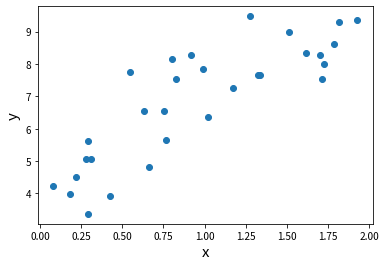

In [28]:
plt.figure(facecolor="white")
plt.scatter(df["x"],df["y"])
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.show()

## scikit-learnによる線形回帰

### 線形回帰の実行

In [33]:
from sklearn.linear_model import LinearRegression

X = df["x"].to_numpy().reshape(-1,1)
y = df["y"].to_numpy().reshape(-1,1)
model = LinearRegression() # インスタンス化
model.fit(X,y) # フィッティング

LinearRegression()

### 回帰直線のプロット 

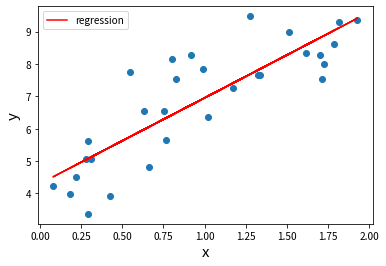

In [36]:
plt.figure(facecolor="white")
plt.scatter(df["x"],df["y"])
plt.plot(df["x"],model.predict(X),c="r",label="regression")
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.legend()
plt.show()

### 結果の出力
sklearn.linear_model.LinearRegressionのメソッドを用いることで回帰係数と決定係数を求めることができる.

In [40]:
print("切片 : ",model.intercept_[0])
print("傾き : ",model.coef_[0][0])
print("決定係数 : ",model.score(X,y)) # 決定係数を計算する説明変数X,目的変数y

切片 :  4.301151886243748
傾き :  2.6508884751449866
決定係数 :  0.7144927280962827


回帰方程式はy=4.3+2.6xで生成元の式がy=4+3xであるから,おおよそデータの特徴を捉えていることがわかる.

## 性能評価
線形回帰モデルの性能を評価するために,データを訓練用とテスト用に分ける.性能の評価は,残差プロット,平均二乗誤差,決定係数,自由度調整済み決定係数が用いられる.

In [51]:
# 自由度調整済み決定係数
def adj_R_squared(n,k,R_squared):
    """
    Description of adj_R_squared
    
    This function calculate adjusted R-squared.
    
    Args : 
    n(int) : number of the data length
    k(int) : number of the parameter of model
    R_squared : R_squared values of the model
    
    Returns :
    adj_R_squared value(float)
    """
    return 1-(n-1)/(n-k-1)*(1-R_squared)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

model = LinearRegression() # インスタンス化
model.fit(X_train,y_train) # フィッティング

LinearRegression()

In [92]:
from sklearn.metrics import mean_squared_error # MSE(平均二乗誤差)
print("切片 : ",model.intercept_[0])
print("傾き : ",model.coef_[0][0])
print("決定係数(train) : ",model.score(X_train,y_train))
print("自由度調整済み決定係数(train) : ",adj_R_squared(X_train.shape[0],2,model.score(X_train,y_train)))
print("MSE(train) : ",mean_squared_error(y_train,model.predict(X_train)))
print("決定係数(test) : ",model.score(X_test,y_test))
print("自由度調整済み決定係数(test) : ",adj_R_squared(X_test.shape[0],2,model.score(X_test,y_test)))
print("MSE(test) : ",mean_squared_error(y_test,model.predict(X_test)))

切片 :  4.537584753061825
傾き :  2.5148037342937726
決定係数(train) :  0.5893346603058843
自由度調整済み決定係数(train) :  0.5461067298117668
MSE(train) :  1.1015354084224593
決定係数(test) :  0.9020092985442774
自由度調整済み決定係数(test) :  0.8628130179619883
MSE(test) :  0.443053824092227


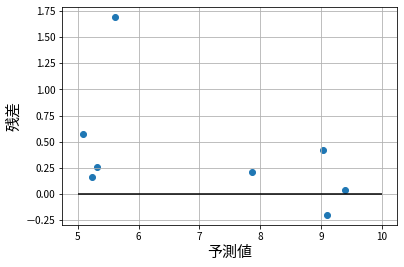

In [71]:
y_pred = model.predict(X_test)
resid = y_pred-y_test

plt.figure(facecolor="white")
plt.scatter(y_pred,resid)
plt.hlines(y = 0, xmin = 5, xmax = 10, color = 'black') # 要調整
plt.xlabel("予測値",fontsize=15) # predicted value
plt.ylabel("残差",fontsize=15) # residuals
plt.grid()
plt.show()

C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


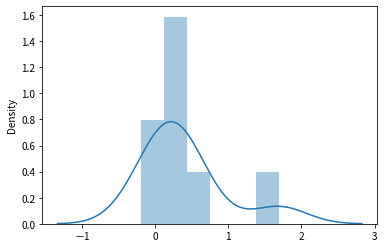

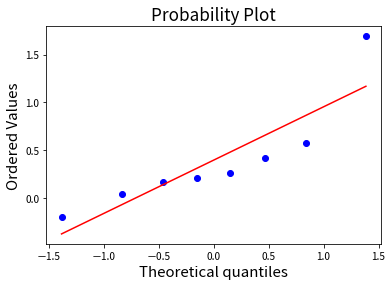

In [93]:
from scipy import stats

# カーネル密度
plt.figure(facecolor='white')
sns.distplot(resid)
plt.show()

# 正規QQプロット
plt.figure(facecolor='white')
stats.probplot(resid.reshape(1,-1)[0],dist=stats.norm,plot=plt)
plt.xlabel("Theoretical quantiles",fontsize = 15)
plt.ylabel("Ordered Values",fontsize = 15)
plt.title("Probability Plot",fontsize = 17)
plt.show()

回帰方程式はy=4.5+2.5xである.データを訓練用とテスト用に分けたことで,データ数が減少し,分割前の回帰方程式よりも値が離れてしまった.しかし,自由度調整済み決定係数からモデルはテストデータを84%説明できていることがわかる.また,MSEがtrainよりもtestのほうが小さいため,過学習を起こしていないことが考えられる.
残差は0を中心に分布しているが,線形モデルでとらえきれないパターンがあるように見える.